

> Work for bootcamp XP Education module one machine learning architect


1.   Using Convolution Neural Network
2.   Comparation between network VGG16 witch CNN common using data set fashion mnist





In [1]:
#imports libs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow.image import resize
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

In [2]:
#get dataset of mnist fashion
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# **Fashion mnist witch VGG16**

In [3]:
def normalize_images(images):
    # initial zero ndarray
    normalized_images = np.zeros_like(images.astype(float))

    # The first images index is number of images where the other indices indicates
    # hieight, width and depth of the image
    num_images = images.shape[0]

    # Computing the minimum and maximum value of the input image to do the normalization based on them
    maximum_value, minimum_value = images.max(), images.min()

    # Normalize all the pixel values of the images to be from 0 to 1
    for img in range(num_images):
        normalized_images[img, ...] = (images[img, ...] - float(minimum_value)) / float(maximum_value - minimum_value)

    return normalized_images

#normalization and trnsform variable target in categorical
train_images = normalize_images(train_images)
test_images = normalize_images(test_images)

#reshape dataset from (28,28,1) to (32,32,3)
x_aux = np.expand_dims(train_images, axis=-1)
x_aux = np.repeat(x_aux, 3, axis=-1)
train_images_VGG = resize(x_aux, [32,32])

x_aux = np.expand_dims(test_images, axis=-1)
x_aux = np.repeat(x_aux, 3, axis=-1)
test_images_VGG = resize(x_aux, [32,32])

#convert to categorical labels and flatten data
train_labels_VGG = np_utils.to_categorical(train_labels)
test_labels_VGG = np_utils.to_categorical(test_labels)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

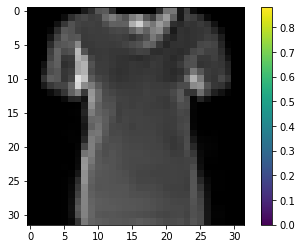

In [4]:
#visualization data categorical
display(train_labels_VGG[0])

#vizualization data
plt.figure()
plt.imshow(test_images_VGG[4000])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
#import VGG16 and add final layer
baseModel = tf.keras.applications.VGG16(
                include_top=True,
                weights=None,
                input_tensor=None,
                input_shape=(32,32,3),
                pooling=None,
                classes=1000,
                classifier_activation="softmax",
            )

headModel = baseModel.output
headModel = Dense(10, activation="softmax")(headModel)
model_VGG16 = Model(inputs=baseModel.input, outputs=headModel)

model_VGG16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

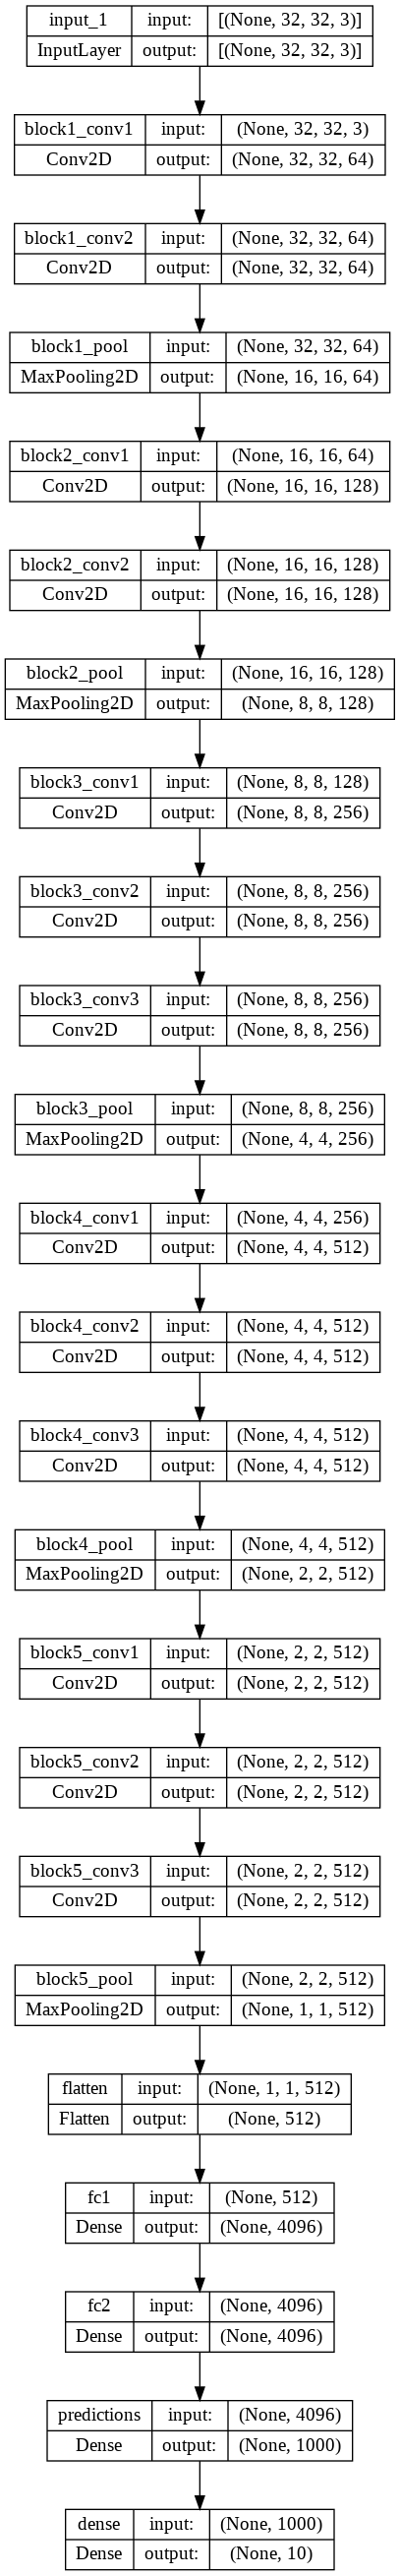

In [6]:
#plot model VGG16 
plot_model(model_VGG16, to_file='model_VGG16.png', show_shapes=True, show_layer_names=True)

In [7]:
#complile and fit model
model_VGG16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

result_VGG16 = model_VGG16.fit(train_images_VGG, train_labels_VGG, validation_data=(test_images_VGG, test_labels_VGG), 
                               epochs=5, verbose=1, batch_size=300)

Epoch 1/5
200/200 [==============================] - 36s 118ms/step - loss: 2.3029 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
200/200 [==============================] - 23s 114ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
200/200 [==============================] - 23s 115ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
200/200 [==============================] - 23s 116ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
200/200 [==============================] - 23s 117ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1000


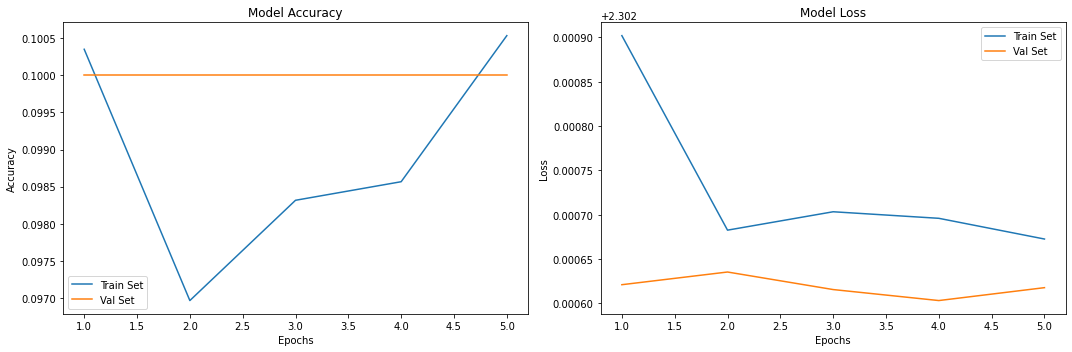

In [8]:
# Plot model performance
acc = result_VGG16.history['accuracy']
val_acc = result_VGG16.history['val_accuracy']
loss = result_VGG16.history['loss']
val_loss = result_VGG16.history['val_loss']
epochs_range = range(1, len(result_VGG16.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

# **Fashion mnist witch CNN common**

In [9]:
#transform values of pixels to float32 nomalized and flatten data
train_images_common = train_images.reshape(train_images.shape[0], 784).astype('float32') / 255
test_images_common = test_images.reshape(test_images.shape[0], 784).astype('float32') / 255

#convert to categorical labels
train_labels_common = np_utils.to_categorical(train_labels)
test_labels_common = np_utils.to_categorical(test_labels)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

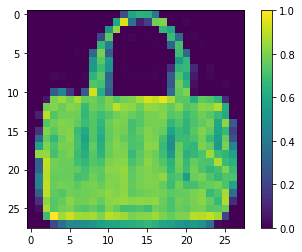

In [10]:
#visualization data categorical
display(train_labels_common[0])

#vizualization data
plt.figure()
plt.imshow(train_images[4000])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#construct model cnn common
model_common = tf.keras.models.Sequential()
model_common.add(tf.keras.layers.Dense(units=784, activation='relu', input_dim=784))
model_common.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model_common.add(tf.keras.layers.Dense(units=2048, activation='relu'))
model_common.add(tf.keras.layers.Dense(units=2048, activation='relu'))
model_common.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model_common.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 1024)              803840    
                                                                 
 dense_3 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_5 (Dense)             (None, 10)                20490     
                                                                 
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


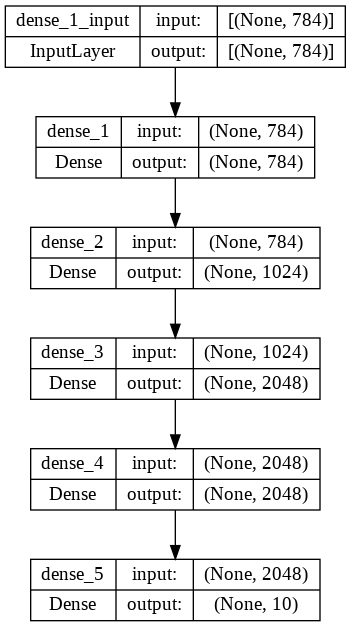

In [12]:
#plot model common
plot_model(model_common, to_file='model_common.png', show_shapes=True, show_layer_names=True)

In [13]:
#complile and fit model
model_common.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

result_cnn_common = model_common.fit(train_images_common, train_labels_common, validation_data=(test_images_common, test_labels_common),
                                     epochs=5, verbose=1, batch_size=300)

Epoch 1/5
200/200 [==============================] - 2s 8ms/step - loss: 0.8722 - accuracy: 0.6664 - val_loss: 0.6214 - val_accuracy: 0.7659
Epoch 2/5
200/200 [==============================] - 1s 7ms/step - loss: 0.5079 - accuracy: 0.8150 - val_loss: 0.5017 - val_accuracy: 0.8132
Epoch 3/5
200/200 [==============================] - 1s 7ms/step - loss: 0.4288 - accuracy: 0.8433 - val_loss: 0.4396 - val_accuracy: 0.8374
Epoch 4/5
200/200 [==============================] - 1s 7ms/step - loss: 0.3854 - accuracy: 0.8594 - val_loss: 0.4257 - val_accuracy: 0.8425
Epoch 5/5
200/200 [==============================] - 1s 7ms/step - loss: 0.3637 - accuracy: 0.8664 - val_loss: 0.4166 - val_accuracy: 0.8485


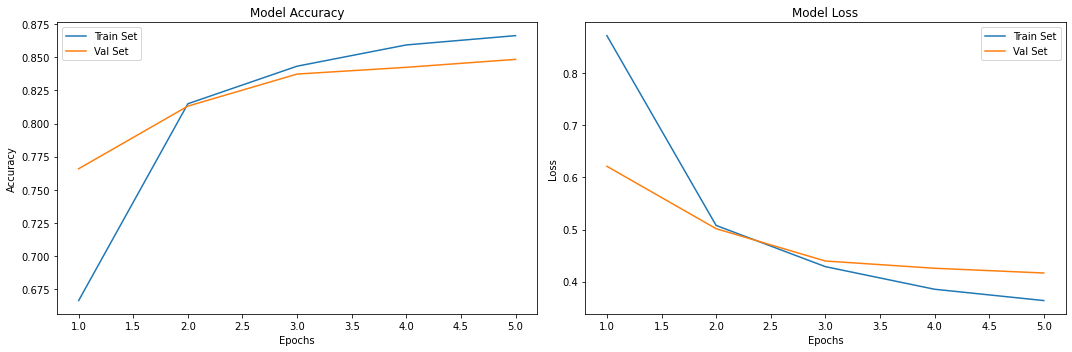

In [14]:
# Plot model performance
acc = result_cnn_common.history['accuracy']
val_acc = result_cnn_common.history['val_accuracy']
loss = result_cnn_common.history['loss']
val_loss = result_cnn_common.history['val_loss']
epochs_range = range(1, len(result_cnn_common.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()